<div class="alert alert-block alert-success"> 
 NHANES Example
</div>

In [1]:
import dill as pickle
from cosinorage.datahandlers import NHANESDataHandler, plot_enmo
from cosinorage.features import WearableFeatures, dashboard
from cosinorage.bioages import CosinorAge

%load_ext autoreload
%autoreload 2

In [2]:
reload_nhanes = False

In [3]:
if reload_nhanes:
    nhanes_handler = NHANESDataHandler(nhanes_file_dir='../data/nhanes/', seqn=62177, verbose=True)
    with open("pickle/nhanes_handler.pkl", "wb") as file:
        pickle.dump(nhanes_handler, file)
else:
    with open("pickle/nhanes_handler.pkl", "rb") as file:
        nhanes_handler = pickle.load(file)

In [4]:
nhanes_handler.get_meta_data()

{'datasource': 'nhanes',
 'raw_n_datapoints': 10080,
 'raw_start_datetime': Timestamp('1900-01-02 00:00:00'),
 'raw_end_datetime': Timestamp('1900-01-08 23:59:00'),
 'raw_data_frequency': 'minute-level',
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'MIMS',
 'n_days': 7}

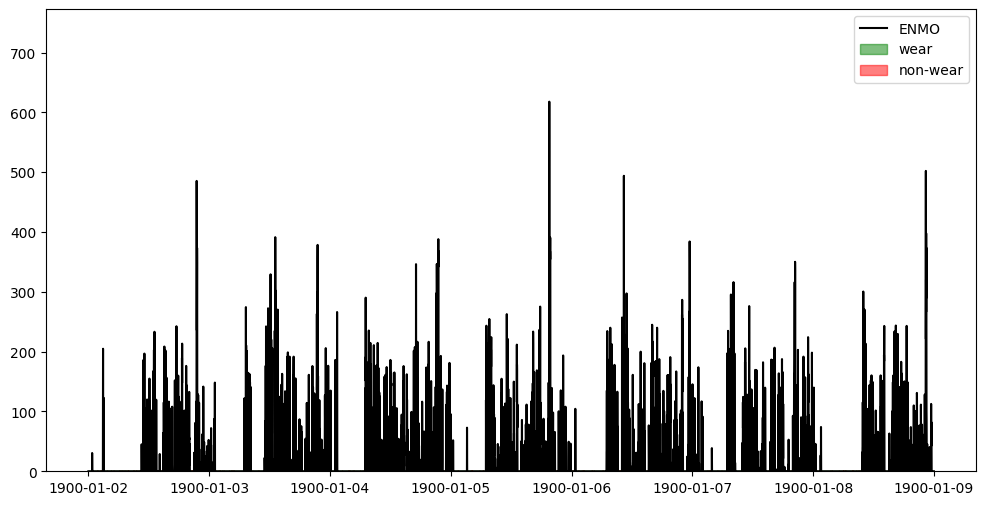

In [5]:
plot_enmo(nhanes_handler)

In [6]:
features_args = {
    'sleep_ck_sf': 0.0025,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 15,
    'pa_cutpoint_lm': 70,
    'pa_cutpoint_mv': 130,
}

In [7]:
features = WearableFeatures(nhanes_handler, features_args)

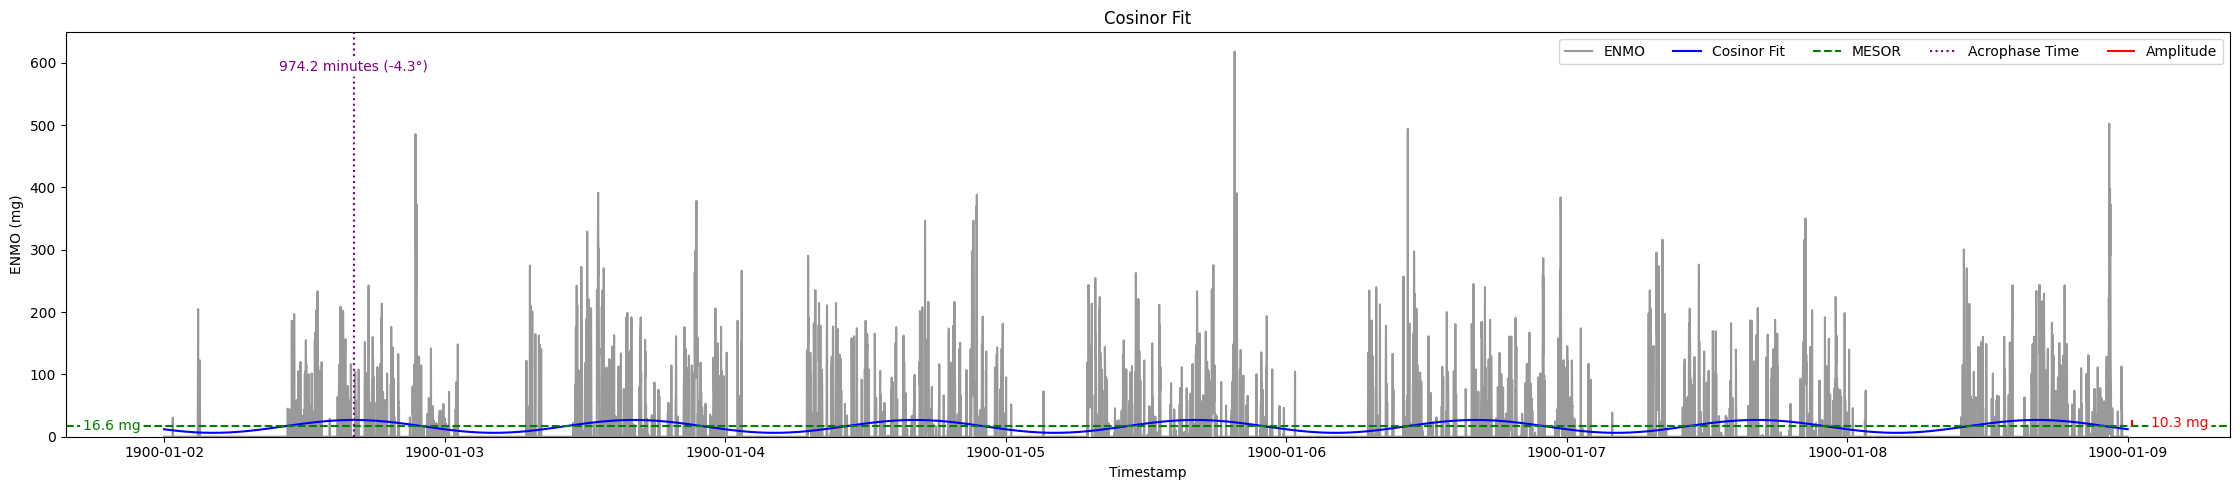

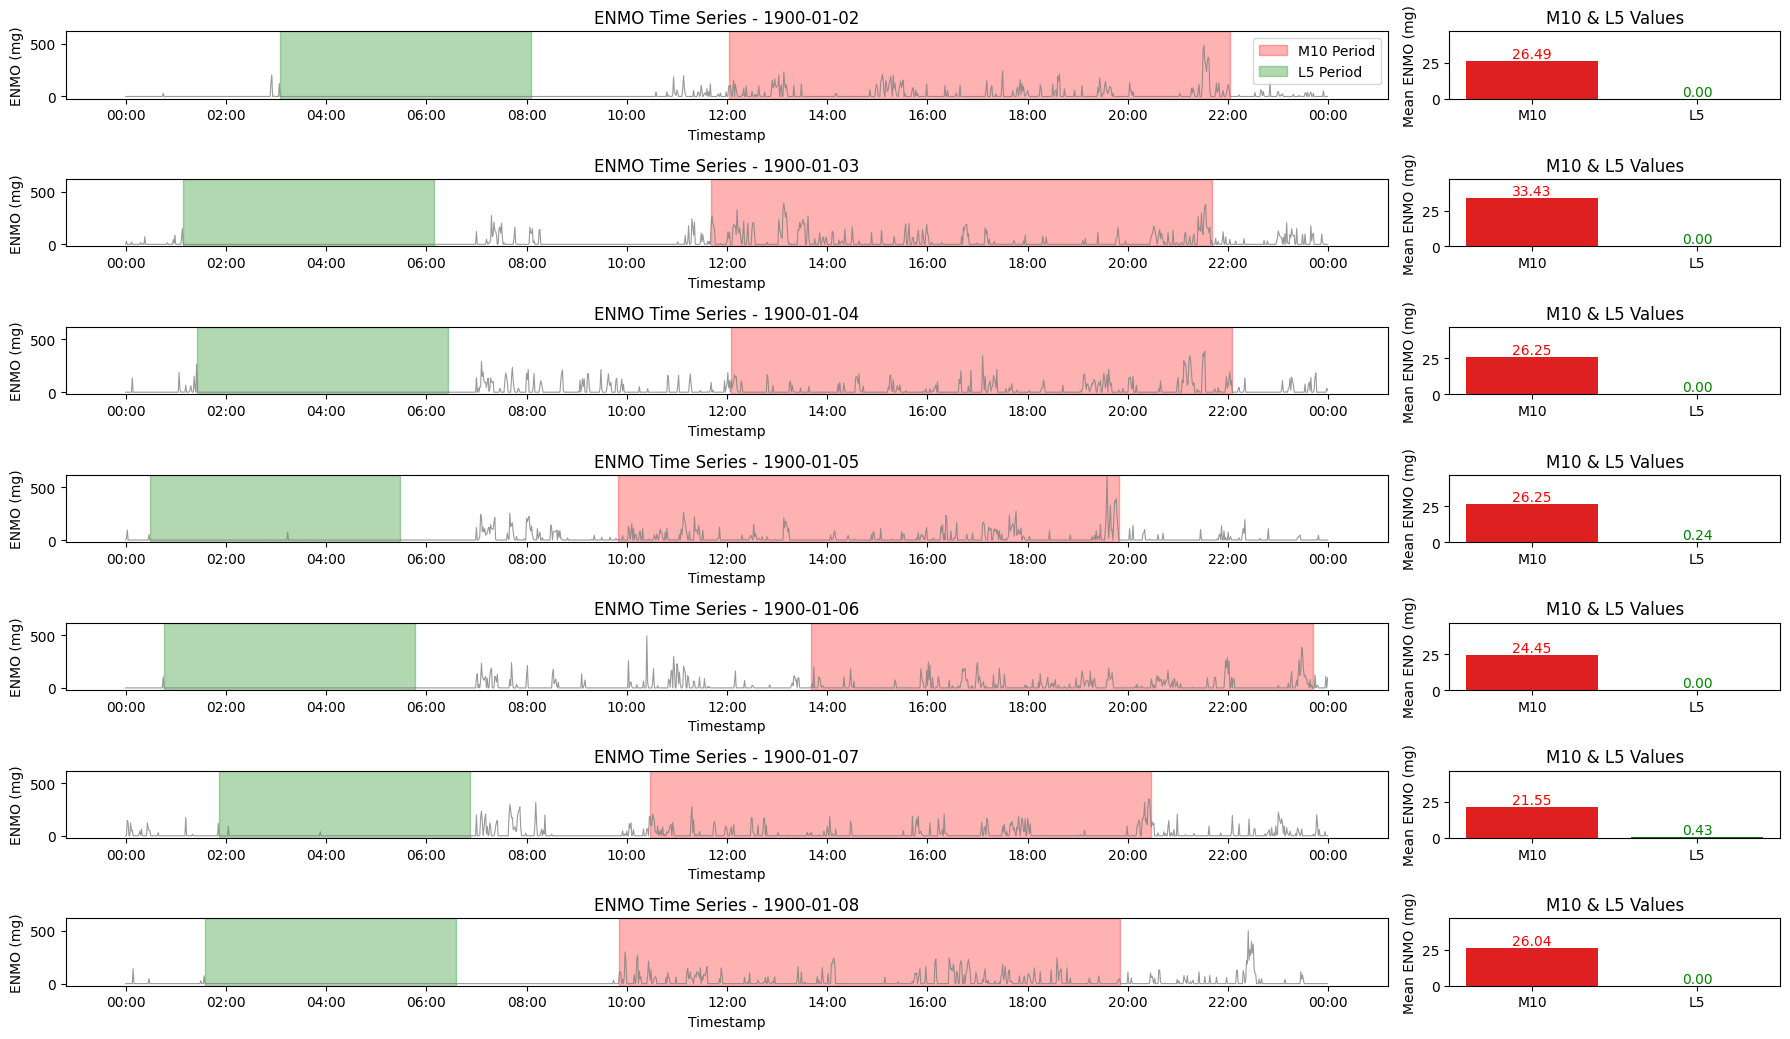

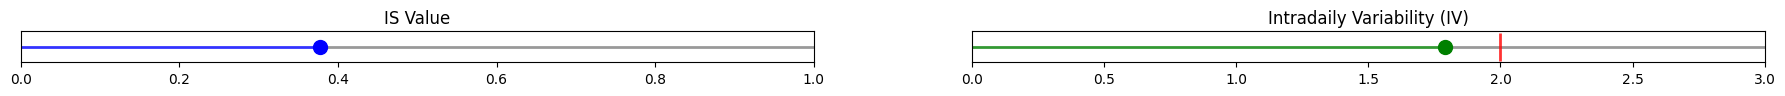

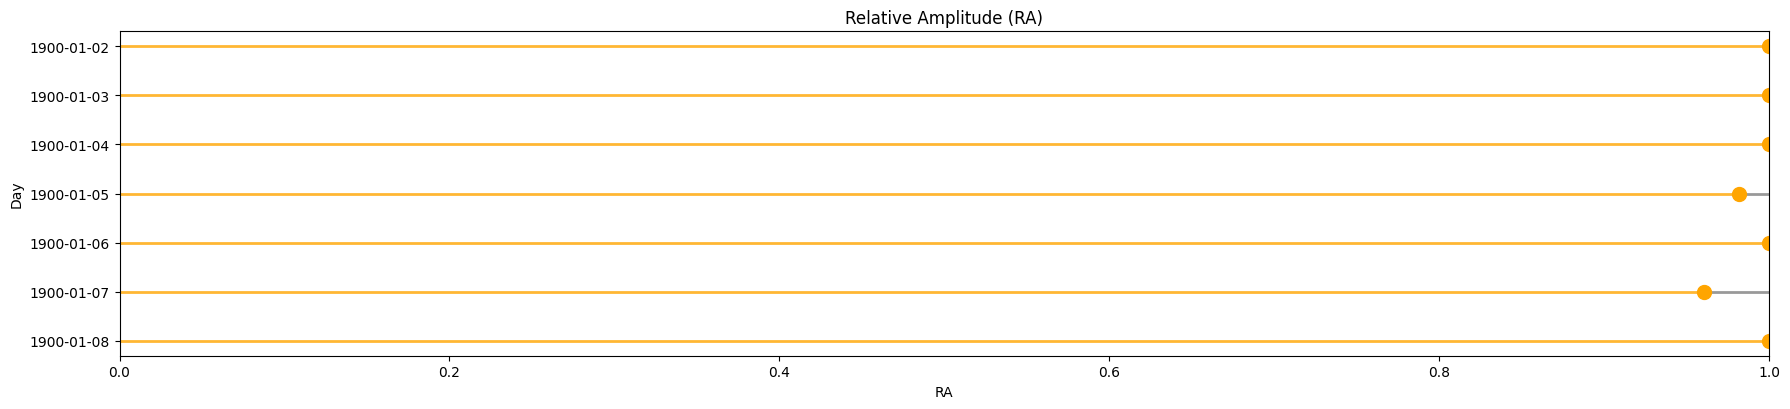

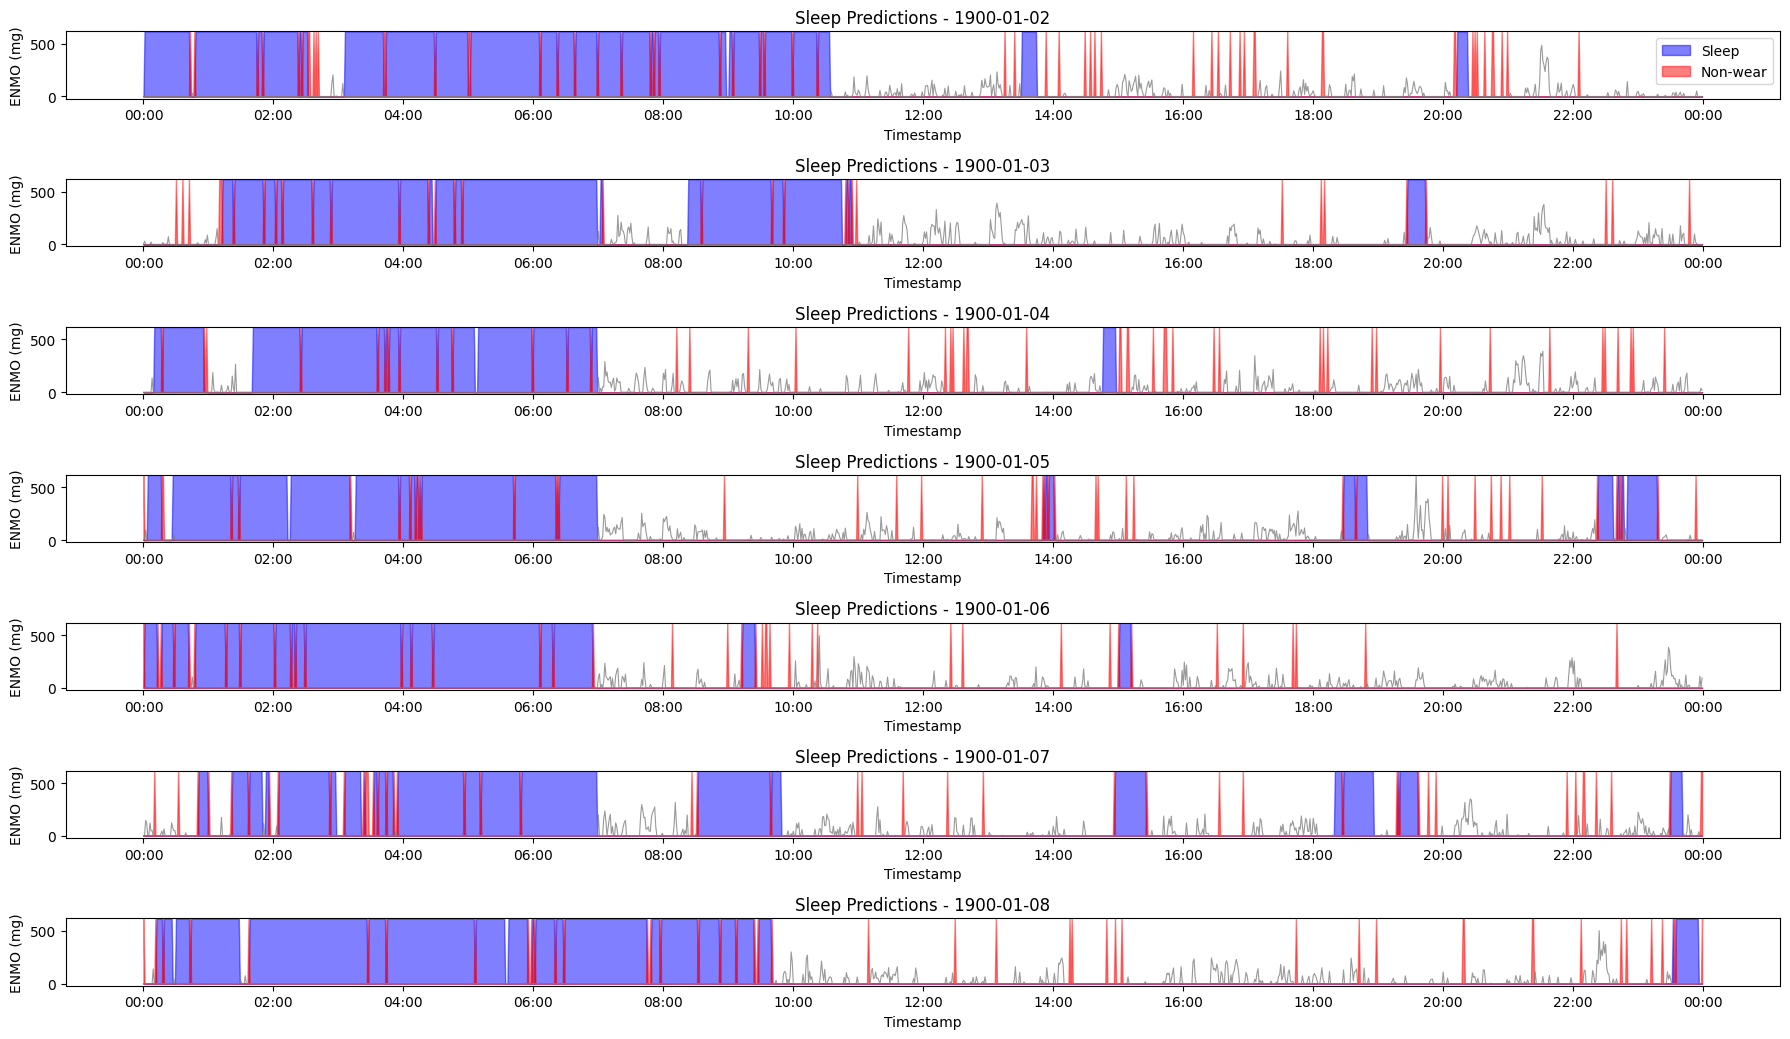

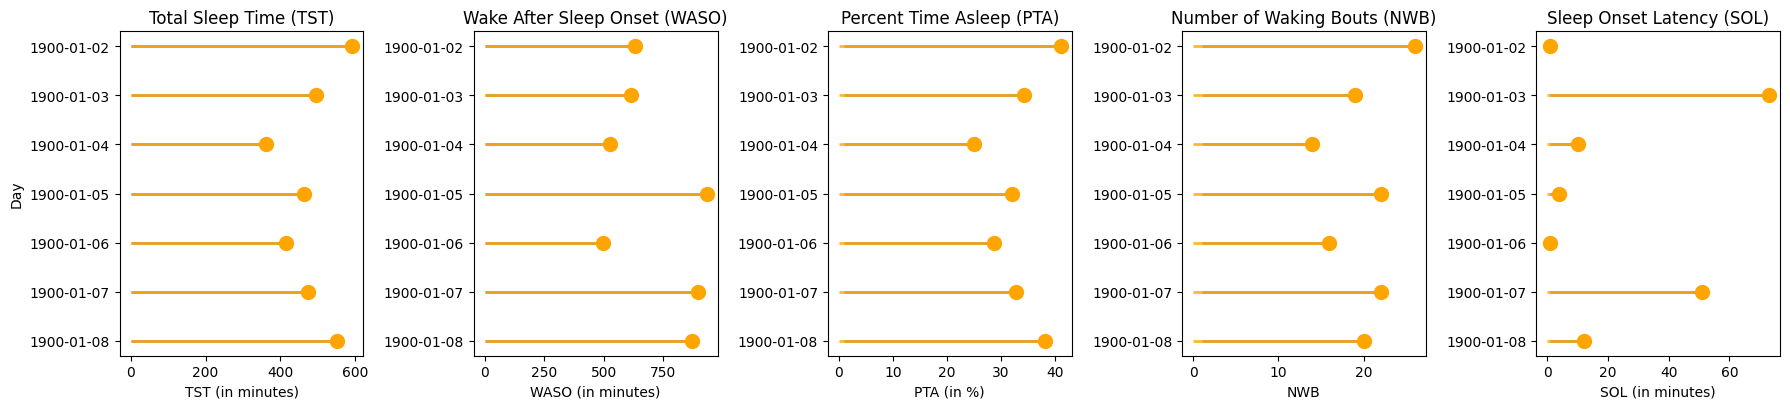

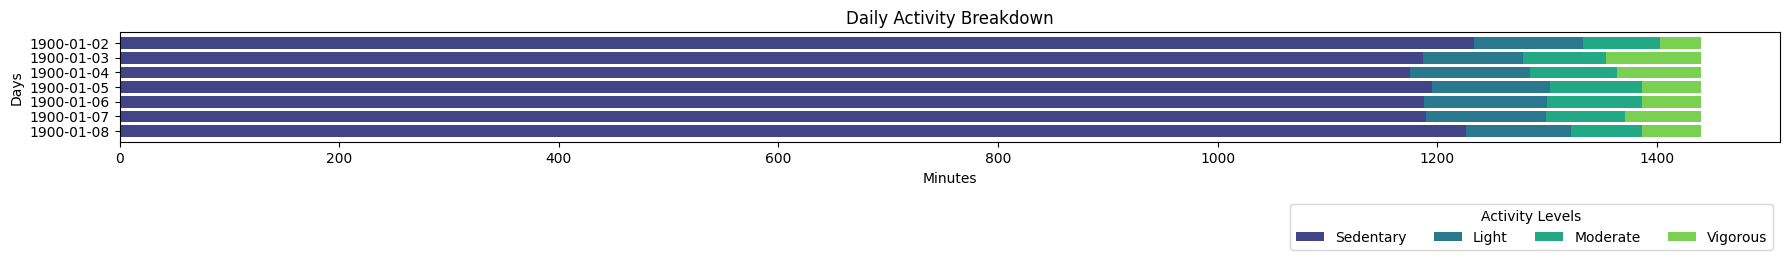

In [8]:
dashboard(features)

In [9]:
import pandas as pd
def get_chrono_age_and_gender(file_path, seqn):
    data = pd.read_csv(file_path)
    data = data[data['seqn'] == seqn]
    age = data['age'].values[0]
    if data['sex'].values[0] == 'Male':
        gender = 'male'
    elif data['sex'].values[0] == 'Female':
        gender = 'female'
    else:
        gender = 'unknown'
    return int(age), gender

def get_gt_cosinor_age(file_path, seqn):
    data = pd.read_csv(file_path)
    data = data[data['seqn'] == seqn]
    gt_cosinor_age = data['cosinor_age'].values[0]
    return float(gt_cosinor_age)

In [10]:
records = [
    {'handler': nhanes_handler, 
     'age': get_chrono_age_and_gender('../data/Age_sex_data/nhanes_age_sex.csv', 62177)[0], 
     'gender': get_chrono_age_and_gender('../data/Age_sex_data/nhanes_age_sex.csv', 62177)[1], 
     'gt_cosinor_age': get_gt_cosinor_age('../data/Age_sex_data/nhanes_cosinor_age.csv', 62177)
    }
]

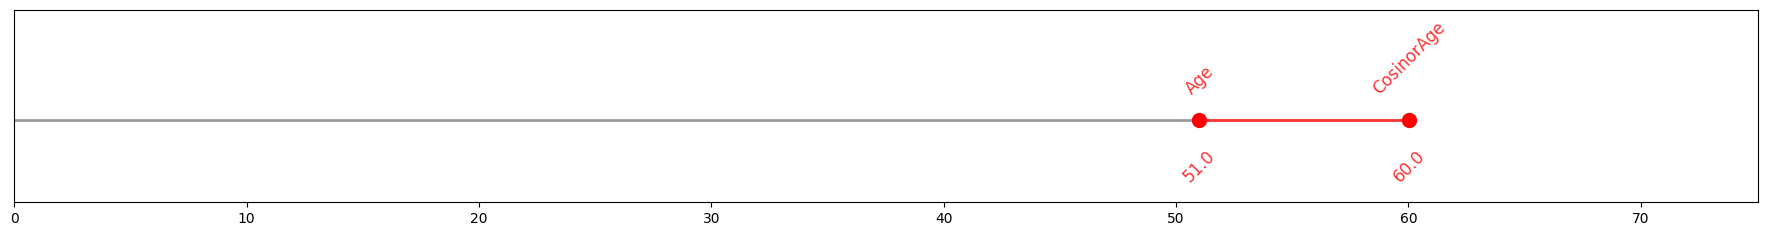

In [11]:
cosinor_age = CosinorAge(records)
cosinor_age.plot_predictions()

In [12]:
cosinor_age.get_predictions()

[{'handler': <cosinorage.datahandlers.nhanesdatahandler.NHANESDataHandler at 0x149305400>,
  'age': 51,
  'gender': 'male',
  'gt_cosinor_age': 53.7112035189498,
  'mesor': np.float64(16.575964371641177),
  'amp1': np.float64(10.330152309416578),
  'phi1': np.float64(-4.250754512739498),
  'cosinoage': 60.037796908366786,
  'cosinoage_advance': 9.037796908366786}]